In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.debugger import Tracer

In [2]:
# Import and Fix Data
df = pd.read_csv('inpatientCharges.csv')
df.columns = df.columns.str.strip()
df['Average Covered Charges'] = df['Average Covered Charges'].str.replace('$', '').astype(float)
df['Average Total Payments'] = df['Average Total Payments'].str.replace('$', '').astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].str.replace('$', '').astype(float)
df['Total Cost'] = df[['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].sum(axis=1)
df['Insurance Covered Ratio'] = (df['Average Covered Charges'] / df['Total Cost'])
df['Cost per Discharge'] = (df['Total Cost'] / df['Total Discharges'])

In [3]:
df.columns

Index([u'DRG Definition', u'Provider Id', u'Provider Name',
       u'Provider Street Address', u'Provider City', u'Provider State',
       u'Provider Zip Code', u'Hospital Referral Region Description',
       u'Total Discharges', u'Average Covered Charges',
       u'Average Total Payments', u'Average Medicare Payments', u'Total Cost',
       u'Insurance Covered Ratio', u'Cost per Discharge'],
      dtype='object')

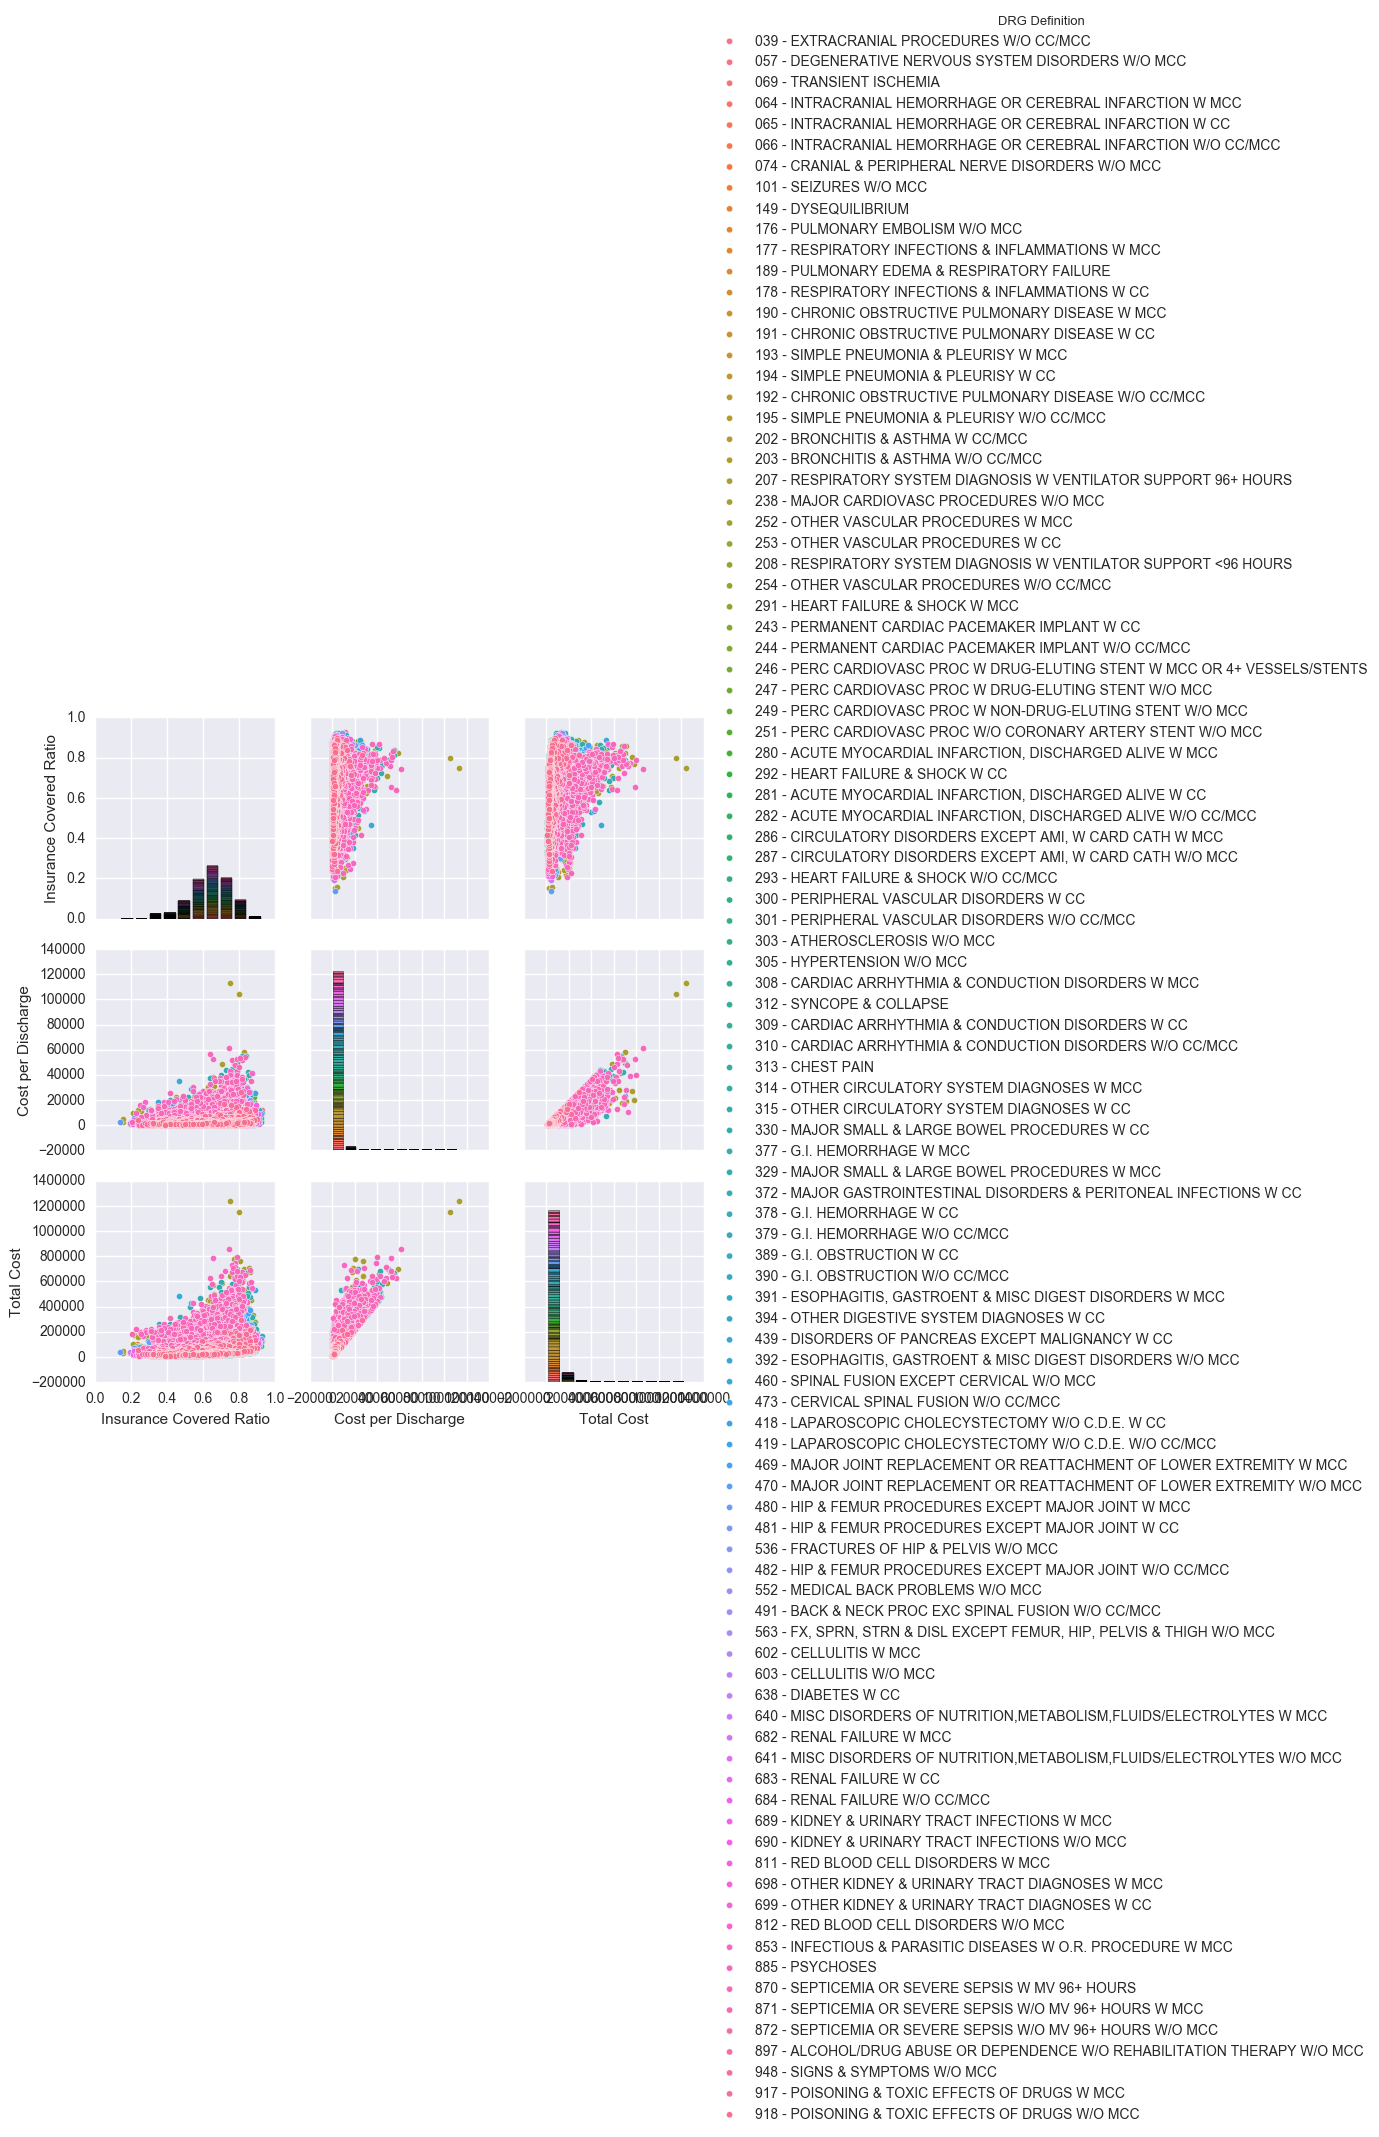

In [4]:
sns.pairplot(df[['Insurance Covered Ratio', 'Cost per Discharge', 'Total Cost', 'DRG Definition']], hue='DRG Definition')

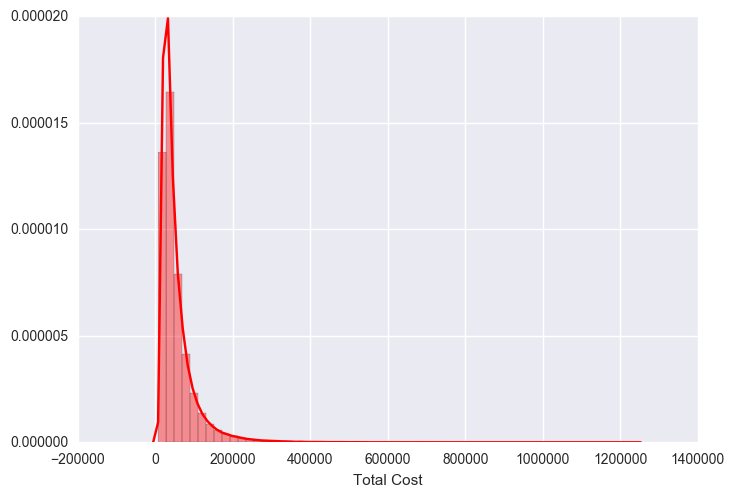

In [5]:
sns.distplot(df['Total Cost'], bins=60, rug=False, color='red')

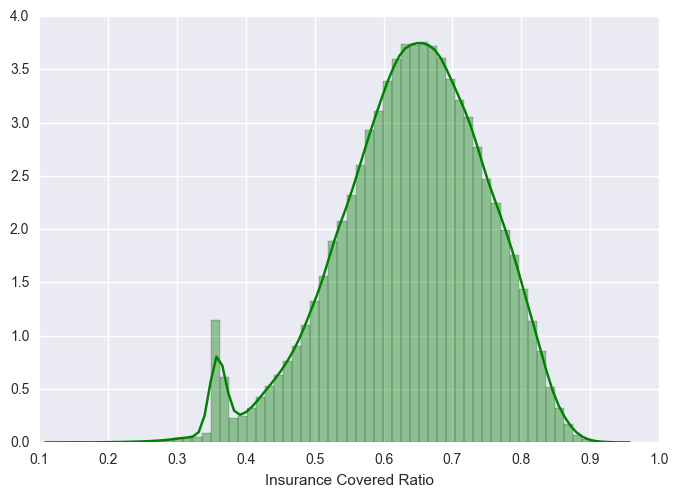

In [6]:
sns.distplot(df['Insurance Covered Ratio'], bins=60, rug=False, color='green')

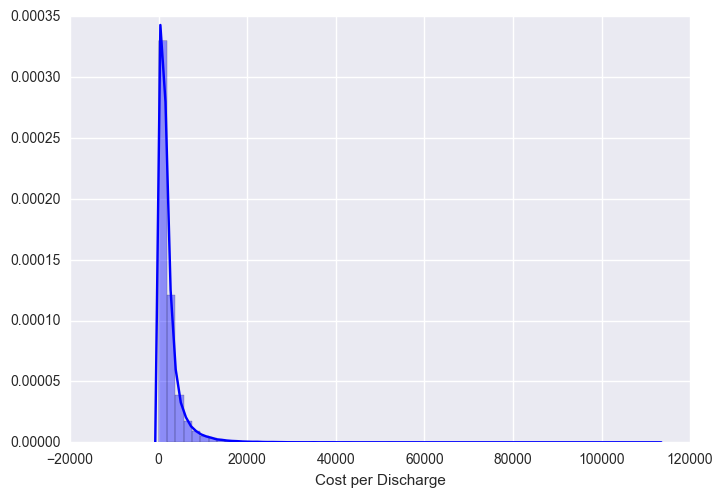

In [7]:
sns.distplot(df['Cost per Discharge'], bins=60, rug=False, color='blue')

In [8]:
# Eliminate Rare Insurance Companies and Illness Conditions
provider_count = df.groupby(['Provider Id']).apply(lambda x: len(x) > 50)
df = df[df['Provider Id'].isin(provider_count[provider_count].index)]

drg_count = df.groupby(['DRG Definition']).apply(lambda x: len(x) > 200)
df = df[df['DRG Definition'].isin(drg_count[drg_count].index)]

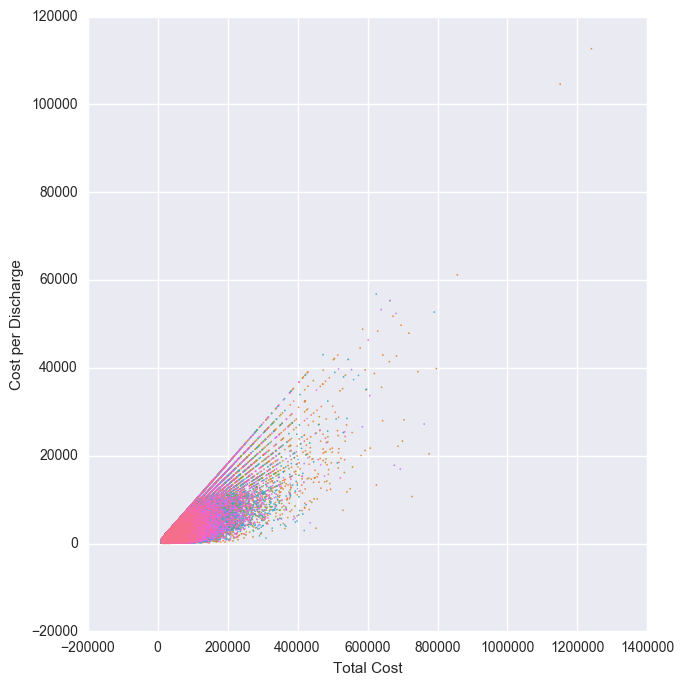

In [9]:
# Look at Data to see if General Patterns Exist
p = sns.FacetGrid(df[['Provider Id', 'Total Cost', 'Cost per Discharge', 'Insurance Covered Ratio']],
              hue='Provider Id', 
              legend_out=False, 
              size=7)
p = (p.map(plt.scatter, 'Total Cost', 'Cost per Discharge', 'Insurance Covered Ratio'))

In [10]:
# drop outliers for cost for each individual DRG Definition

def drop_by_std_dev(df):
    list_of_DRG = df['DRG Definition'].unique().tolist()
    out = []
    for drg in list_of_DRG:
        data = df[df['DRG Definition'] == drg]
        mean, std = data['Total Cost'].mean(), data['Total Cost'].std()
        inliers = data[(data['Total Cost'] <= (mean + (std*2))) & (data['Total Cost'] >= (mean - (std*2)))]
        try:
            out = out.append(inliers)
        except:
            pass
    return pd.concat(out)

In [11]:
drop_by_std_dev(df)

TypeError: 'NoneType' object is not iterable